In [95]:
import pandas as pd
import numpy as np
import scipy.spatial as sp
import scipy.stats as ss

In [32]:
data = pd.read_pickle('data.pkl')
df_data = pd.DataFrame(index = data['w'], columns = data['d'])

for i in range(len(data['E'])):
    df_data.iloc[i] = data['E'][i]
print(df_data.head())

                                                    1900  \
time   [0.029941831207784802, -0.02888938384068301, -...   
man    [0.0438109732724913, 0.05854920762569788, -0.0...   
years  [0.09252118750279203, 0.008607383769279785, -0...   
part   [-0.0385664680636964, -0.1744199723838715, -0....   
way    [-0.08634049283419074, -0.030069098320617823, ...   

                                                    1910  \
time   [0.037282079533355064, -0.02366882204544422, 0...   
man    [0.08625835216112851, -0.01616126803888344, -0...   
years  [0.09970512287724817, 0.002169214875790059, 0....   
part   [-0.03336909227155278, -0.08891772862948832, -...   
way    [-0.06769274543208781, -0.11330100178912951, -...   

                                                    1920  \
time   [0.014153585918742448, -0.08346375082099992, 0...   
man    [0.10406204356385033, 0.04241508429977421, -0....   
years  [0.08011216309801482, 0.007946135468834457, -0...   
part   [-0.03630182006487746, -0.12410

# Method 1 cosine similarity between the first and last vector

In [51]:
# cosntruct cosine similarity between 1900 and 1990 vector
df_method1 = pd.DataFrame()
df_method1['distance'] = df_data.apply(lambda row: sp.distance.cosine(row[1900], row[1990]), axis = 1)
df_method1['similarity'] = df_data.apply(lambda row: 1 - sp.distance.cosine(row[1900], row[1990]), axis = 1)

print(df_method1.head())
print(df_method1.shape)

       distance  similarity
time   0.549711    0.450289
man    0.500059    0.499941
years  0.290727    0.709273
part   0.420476    0.579524
way    0.450848    0.549152
(2000, 2)


/home/kai/anaconda3/lib/python3.8/site-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


In [52]:
# find the 20 most changed
df_method1.nlargest(20, 'distance')

,distance,similarity
programs,0.990806,0.009194
objectives,0.977793,0.022207
computer,0.961241,0.038759
radio,0.905270,0.094730
sector,0.900684,0.099316
goals,0.845148,0.154852
approach,0.839861,0.160139
van,0.836748,0.163252
shri,0.824432,0.175568
media,0.812535,0.187465


In [53]:
# find the 20 least changed
df_method1.nlargest(20, 'similarity')

,distance,similarity
april,0.235207,0.764793
june,0.261176,0.738824
november,0.282573,0.717427
february,0.286365,0.713635
years,0.290727,0.709273
october,0.297144,0.702856
increase,0.301430,0.698570
january,0.301796,0.698204
century,0.307306,0.692694
months,0.309721,0.690279


In [65]:
df_data.columns[0]

1900

# Method 2 find the largest cosine distance

In [67]:
def max_distance(row):
    max_distance = 0
    for a in df_data.columns:
        for b in df_data.columns:
            distance = sp.distance.cosine(row[a], row[b])
            if distance > max_distance:
                max_distance = distance
    return max_distance

In [68]:
df_method2 = pd.DataFrame()
df_method2['max_distance'] = df_data.apply(lambda row: max_distance(row), axis = 1)

print(df_method2.head())
print(df_method2.shape)

/home/kai/anaconda3/lib/python3.8/site-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


       max_distance
time       0.549711
man        0.500059
years      0.349555
part       0.448317
way        0.477007
(2000, 1)


In [70]:
# find the 20 most changed
df_method2.nlargest(20, 'max_distance')

,max_distance
objectives,0.998508
computer,0.996271
programs,0.990806
sector,0.962357
radio,0.933898
goals,0.859533
perspective,0.855663
shri,0.849910
impact,0.848007
approach,0.839861


In [71]:
# find the 20 least changed
df_method2.nsmallest(20, 'max_distance')

,max_distance
april,0.255982
november,0.282573
february,0.294965
october,0.300827
january,0.301796
june,0.313244
december,0.313738
september,0.317869
century,0.318048
daughter,0.320092


# Method 3 variance between the historical cosine distance

In [89]:
def find_distance(row):
    return [sp.distance.cosine(row[a], row[1900]) for a in df_data.columns]

In [91]:
# first find cosine distance between all years regarding the first year
df_method3 = pd.DataFrame(index = df_data.index, columns = df_data.columns)

for index, row in df_data.iterrows():
    df_method3.loc[index] = find_distance(row)

print(df_method3.head())

      1900      1910      1920      1930      1940      1950      1960  \
time     0  0.312143  0.412803  0.464382  0.431643  0.453214  0.522088   
man      0  0.294006  0.271767   0.35491   0.38199  0.387798  0.437013   
years    0   0.16978   0.18921  0.214637  0.243399  0.247306  0.273244   
part     0  0.237956  0.263534  0.366659  0.288211  0.342111  0.363493   
way      0  0.351412  0.324455  0.345656  0.376462  0.369726  0.389436   

           1970      1980      1990  
time   0.485298  0.475017  0.549711  
man    0.406482  0.470399  0.500059  
years  0.255749  0.328507  0.290727  
part   0.386299  0.403723  0.420476  
way    0.477007   0.44636  0.450848  


/home/kai/anaconda3/lib/python3.8/site-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


In [92]:
# calculate the variance for each word
df_method3['var'] = df_method3.var(axis = 1)

print(df_method3.head())

      1900      1910      1920      1930      1940      1950      1960  \
time     0  0.312143  0.412803  0.464382  0.431643  0.453214  0.522088   
man      0  0.294006  0.271767   0.35491   0.38199  0.387798  0.437013   
years    0   0.16978   0.18921  0.214637  0.243399  0.247306  0.273244   
part     0  0.237956  0.263534  0.366659  0.288211  0.342111  0.363493   
way      0  0.351412  0.324455  0.345656  0.376462  0.369726  0.389436   

           1970      1980      1990       var  
time   0.485298  0.475017  0.549711  0.024995  
man    0.406482  0.470399  0.500059  0.020223  
years  0.255749  0.328507  0.290727  0.008229  
part   0.386299  0.403723  0.420476  0.015307  
way    0.477007   0.44636  0.450848  0.017923  


In [93]:
# find the 20 most changed
df_method3.nlargest(20, 'var')

,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,var
computer,0,NaN,NaN,NaN,0.841302,0.975681,0.973481,0.996271,0.961588,0.961241,0.131930
objectives,0,0.784954,0.958824,0.917016,0.968449,0.992453,0.942944,0.987914,0.998508,0.977793,0.093705
programs,0,0.780385,0.931128,0.891869,0.95319,0.921849,0.945334,0.966154,0.961602,0.990806,0.089319
shri,0,NaN,0.689228,NaN,NaN,0.800289,0.806615,0.750721,0.767438,0.824432,0.087399
radio,0,0.527914,0.768404,0.84687,0.882799,0.849247,0.933898,0.893777,0.884077,0.90527,0.082844
van,0,0.335607,0.51901,0.691636,0.752772,0.787297,0.796872,0.800776,0.775301,0.836748,0.073374
approach,0,0.229131,0.318352,0.394632,0.504251,0.545247,0.620894,0.745635,0.815455,0.839861,0.073276
sector,0,0.782624,0.744099,0.710642,0.746588,0.797529,0.822054,0.837493,0.920044,0.900684,0.069579
impact,0,0.340628,0.39773,0.437278,0.557605,0.608328,0.722363,0.782192,0.848007,0.800034,0.068959
goals,0,0.734812,0.738106,0.755836,0.783825,0.753557,0.788155,0.810507,0.859533,0.845148,0.063522


In [94]:
# find the 20 least changed
df_method3.nsmallest(20, 'var')

,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,var
april,0,0.154503,0.17109,0.17572,0.187201,0.199563,0.206833,0.230479,0.239231,0.235207,0.004823
october,0,0.167688,0.162119,0.17861,0.20458,0.217223,0.23689,0.253702,0.269283,0.297144,0.006858
november,0,0.153282,0.18255,0.190752,0.192928,0.228641,0.231075,0.277392,0.270345,0.282573,0.006906
february,0,0.172435,0.210255,0.218743,0.198978,0.224365,0.247491,0.261612,0.294965,0.286365,0.007001
january,0,0.176358,0.19119,0.215119,0.198574,0.224992,0.237199,0.257521,0.288929,0.301796,0.007068
increase,0,0.195601,0.207274,0.207872,0.226616,0.245881,0.2659,0.258067,0.303722,0.30143,0.007467
months,0,0.180375,0.211011,0.19907,0.26746,0.269375,0.251018,0.263213,0.256757,0.309721,0.007489
miles,0,0.15299,0.180173,0.203443,0.205964,0.240149,0.211805,0.229826,0.284669,0.325713,0.007571
june,0,0.191445,0.201638,0.202202,0.246236,0.256027,0.262397,0.311813,0.29283,0.261176,0.007668
september,0,0.138672,0.184472,0.188146,0.24046,0.234448,0.221888,0.263229,0.274406,0.317869,0.007830


# Pearson correlation

In [101]:
columns_name = ['method1', 'method2', 'method3']
df_pc = pd.DataFrame(index = columns_name, columns = columns_name)

# replace NaN with 0
df_method1['distance'].fillna(0, inplace=True)
df_method2['max_distance'].fillna(0, inplace=True)
df_method3['var'].fillna(0, inplace=True)

method11 = ss.pearsonr(df_method1['distance'], df_method1['distance'])[0]
method12 = ss.pearsonr(df_method1['distance'], df_method2['max_distance'])[0]
method13 = ss.pearsonr(df_method1['distance'], df_method3['var'])[0]
df_pc.loc['method1'] = [method11, method12, method13]

method21 = ss.pearsonr(df_method2['max_distance'], df_method1['distance'])[0]
method22 = ss.pearsonr(df_method2['max_distance'], df_method2['max_distance'])[0]
method23 = ss.pearsonr(df_method2['max_distance'], df_method3['var'])[0]
df_pc.loc['method2'] = [method21, method22, method23]

method31 = ss.pearsonr(df_method3['var'], df_method1['distance'])[0]
method32 = ss.pearsonr(df_method3['var'], df_method2['max_distance'])[0]
method33 = ss.pearsonr(df_method3['var'], df_method3['var'])[0]
df_pc.loc['method3'] = [method31, method32, method33]

print(df_pc)

          method1   method2   method3
method1         1  0.926098  0.926358
method2  0.926098         1  0.924657
method3  0.926358  0.924657         1


# Accuracy meassurement method: Jaccard similarity

In [120]:
def jaccard_similarity(s1, s2):
    intersect = s1.intersection(s2).shape[0]
    union = s1.append(s2).unique().shape[0]
    return intersect/union

In [125]:
# Use jaccard similarity to compare the overlap of the 20 most changed and least changed word.
from sklearn.metrics import jaccard_score

# most changed
method12c = jaccard_similarity(df_method1.nlargest(20, 'distance').index, df_method2.nlargest(20, 'max_distance').index)
method13c = jaccard_similarity(df_method1.nlargest(20, 'distance').index, df_method3.nlargest(20, 'var').index)
method23c = jaccard_similarity(df_method2.nlargest(20, 'max_distance').index, df_method3.nlargest(20, 'var').index)

method12s = jaccard_similarity(df_method1.nlargest(20, 'similarity').index, df_method2.nsmallest(20, 'max_distance').index)
method13s = jaccard_similarity(df_method1.nlargest(20, 'similarity').index, df_method3.nsmallest(20, 'var').index)
method23s = jaccard_similarity(df_method2.nsmallest(20, 'max_distance').index, df_method3.nsmallest(20, 'var').index)

print('For top20 different words')
print('jaccard_score method12 : '+ str(method12c))
print('jaccard_score method13 : '+ str(method13c))
print('jaccard_score method23 : '+ str(method23c))

print('For top20 similiar words')
print('jaccard_score method12 : '+ str(method12s))
print('jaccard_score method13 : '+ str(method13s))
print('jaccard_score method23 : '+ str(method23s))

For top20 different words
jaccard_score method12 : 0.8181818181818182
jaccard_score method13 : 0.7391304347826086
jaccard_score method23 : 0.7391304347826086
For top20 similiar words
jaccard_score method12 : 0.5384615384615384
jaccard_score method13 : 0.48148148148148145
jaccard_score method23 : 0.5384615384615384


# Top 3

In [126]:
# the top 3 for all three methods are the same
df_method1.nlargest(3, 'distance').index

Index(['programs', 'objectives', 'computer'], dtype='object')

In [137]:
def find_distance_adj(row):
    distance = []
    distance.clear()
    for a in df_data.columns:
        if (a != 1900):
            distance.append(sp.distance.cosine(row[a], row[temp]))
        temp = a
    return distance

In [141]:
# change is detected by change in biggest change in adjcent cosine distance
columns_name = ['00-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90']
df_adj = pd.DataFrame(index = df_method1.nlargest(3, 'distance').index, columns = columns_name)
for word in df_method1.nlargest(3, 'distance').index:
    df_adj.loc[word] = find_distance_adj(df_data.loc[word])
    
# replace NaN with 0
df_adj.fillna(0, inplace=True)
print(df_adj)

               00-10     10-20     20-30     30-40     40-50     50-60  \
programs    0.780385  0.625726  0.355935  0.214636  0.269355  0.221755   
objectives  0.784954  0.751524  0.238744  0.223887  0.240712  0.223910   
computer    0.000000  0.000000  0.000000  0.000000  0.649502  0.318317   

               60-70     70-80     80-90  
programs    0.225461  0.226661  0.225395  
objectives  0.214566  0.217542  0.242629  
computer    0.246067  0.248958  0.218228  


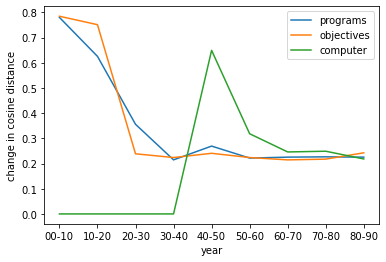

In [149]:
import matplotlib.pyplot as plt

plt.plot(df_adj.columns, df_adj.loc['programs'], label='programs')
plt.plot(df_adj.columns, df_adj.loc['objectives'], label='objectives')
plt.plot(df_adj.columns, df_adj.loc['computer'], label='computer')
plt.xlabel('year')
plt.ylabel('change in cosine distance')
plt.legend(loc='upper right')
plt.show()